# Chapter 10 統計的推定

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])

In [3]:
p_mean = np.mean(scores)
p_var = np.var(scores)

print(p_mean, p_var)

69.53 206.6691


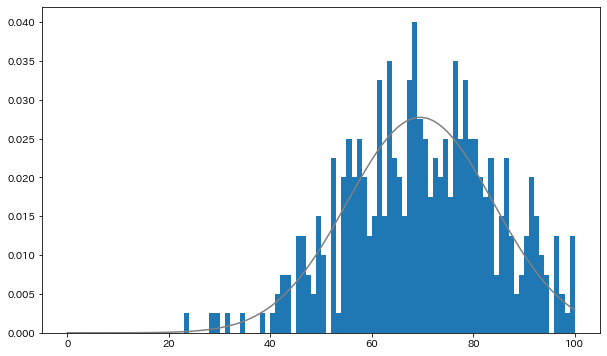

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)
plt.show()

In [5]:
np.random.seed(0)

n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [6]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 10.1　|　点推定

### 10.1.1　母平均の点推定

In [7]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

In [8]:
np.mean(np.random.choice(scores, int(1e6)))

69.542954

In [9]:
s_mean = np.mean(sample)
print(s_mean)

70.4


### 10.1.2　母分散の点推定

In [10]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.34417850000003

In [11]:
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.67808263157895

In [12]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.08336592317

In [13]:
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

## 10.2　|　区間推定

### 10.2.1　正規分布の母平均(分散概知)の区間指定

In [15]:
# 95% 信頼区間を求める

rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(p_var/n)

lcl, ucl

(64.09956018535247, 76.70043981464754)

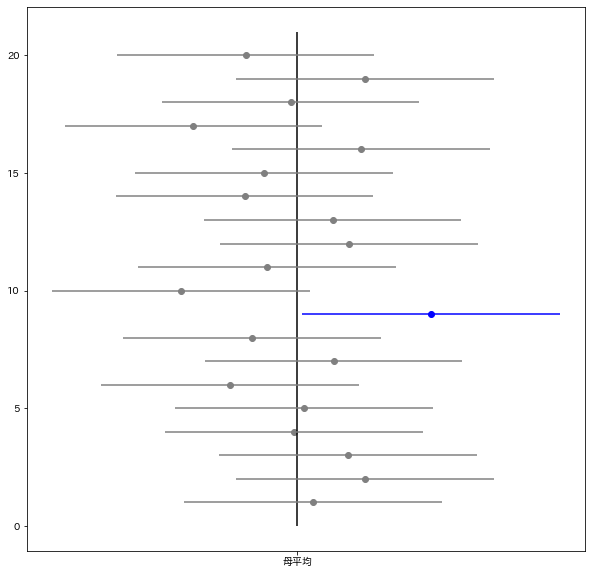

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)

for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['母平均'])

plt.show()

### 10.2.2　正規分布の母分散(母平均未知)の区間推定

In [18]:
# 95% 信頼区間

rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(91.52471947132238, 337.5955129124592)

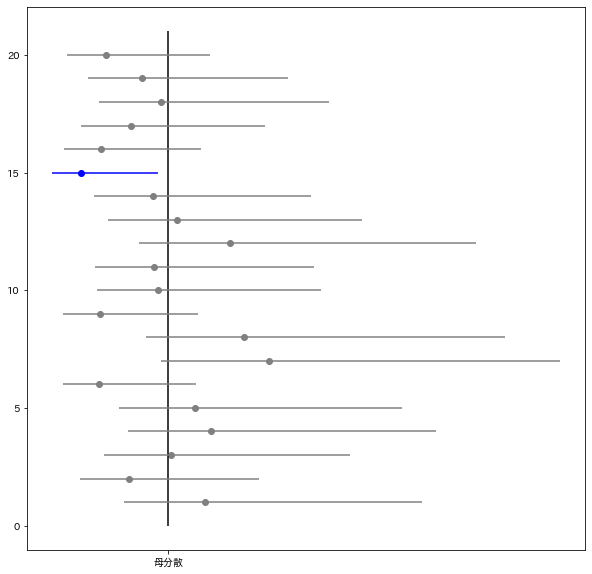

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['母分散'])
plt.show()

# カイ二乗分布が右に歪んでいるように右の幅が広く長くなっている

### 10.2.3　正規分布の母平均(母分散未知)の区間推定

$\sigma が未知のため標準誤差 \sqrt{\sigma^2 / n} が使えない. \\
\sigma の代わりに推定量である s を使う. \\
それを t とおくと \\
t = \frac{\bar{X} - \mu}{\sqrt{s^2 / n}} \\
ここで標準正規分布 Z は \\
Z = \frac{(\bar{X} - \mu)}{\sqrt{\sigma^2 / n}} \\
なので, 比較すると \\
t = \frac{Z}{\sqrt{s^2 / \sigma^2}}$

$Y = \frac{(n - 1) s^2}{\sigma^2} \\
とおくと \\
Y 〜 \chi_{n - 1}^2 \\
であり \\
\frac{s^2}{\sigma^2} = \frac{Y}{n - 1} \\
と変形できるので \\
t = \frac{Z}{\sqrt{Y / (n - 1)}} \\
これは 自由度 n - 1 の t 分布に一致する.$

In [27]:
# 95% 信頼区間
#s_var = np.var(sample)
s_var = np.mean(sample_vars)

rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_var/n)

lcl, ucl

(63.84204795856597, 76.95795204143404)

### 10.2.4　ベルヌーイ分布の母平均区間推定

In [29]:
enq_df = pd.read_csv('../data/ch10_enquete.csv')
enq = np.array(enq_df['知っている'])
n = len(enq)

enq[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [30]:
s_mean = enq.mean()
s_mean

0.709

In [31]:
# 中止極限定理で近似

rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.6808474522924337, 0.7371525477075662)

### 10.2.5　ポアソン分布の母平均の信頼区間

In [32]:
acc_df = pd.read_csv('../data/ch10_access.csv')
n_acc = np.array(acc_df['アクセス数'])
n = len(n_acc)
n_acc[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8])

In [33]:
s_mean = n_acc.mean()
s_mean

10.444444444444445

In [34]:
# 中心極限定理で近似

rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.697953549598202, 11.190935339290688)